In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
out = os.path.join(os.getcwd(), 'output/leiden_clustermap')
if not os.path.exists(out):
    os.makedirs(out)

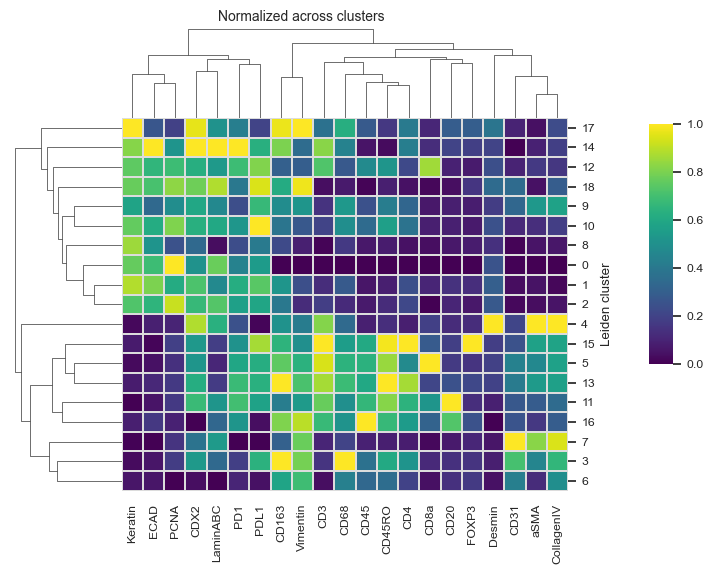

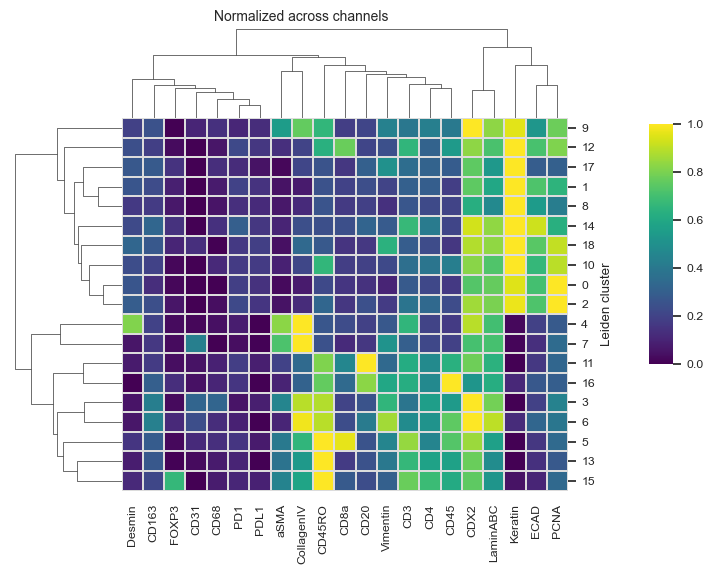

In [3]:
# Paths and input
clustermap_input = pd.read_parquet(
        os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_leiden.parquet')
)

abx_channels = {
    'anti_CD3_nucleiRingMask': 'CD3', 'anti_CD45RO_nucleiRingMask': 'CD45RO', 'Keratin_570_nucleiRingMask': 'Keratin',
    'aSMA_660_nucleiRingMask': 'aSMA','CD4_488_nucleiRingMask': 'CD4', 'CD45_PE_nucleiRingMask': 'CD45',
    'PD1_647_nucleiRingMask': 'PD1', 'CD20_488_nucleiRingMask': 'CD20', 'CD68_555_nucleiRingMask': 'CD68',
    'CD8a_660_nucleiRingMask': 'CD8a', 'CD163_488_nucleiRingMask': 'CD163', 'FOXP3_570_nucleiRingMask': 'FOXP3',
    'PDL1_647_nucleiRingMask': 'PDL1', 'Ecad_488_nucleiRingMask': 'ECAD', 'Vimentin_555_nucleiRingMask': 'Vimentin',
    'CDX2_647_nucleiRingMask': 'CDX2', 'LaminABC_488_nucleiRingMask': 'LaminABC', 'Desmin_555_nucleiRingMask': 'Desmin',
    'CD31_647_nucleiRingMask': 'CD31', 'PCNA_488_nucleiRingMask': 'PCNA', 'CollagenIV_647_nucleiRingMask': 'CollagenIV'
}

clustermap_input = clustermap_input[list(abx_channels.keys()) + ['cluster_2d']].groupby('cluster_2d').mean()

sns.set(font_scale=0.8)
for name, axis in zip(['clusters', 'channels'], [1, 0]):

    g = sns.clustermap(
        clustermap_input, cmap='viridis', standard_scale=axis,
        square=False, yticklabels=1, linecolor='gainsboro', linewidth=0.2, cbar=True
    )
    g.fig.suptitle(f'Normalized across {name}', y=1.01, fontsize=10)
    g.fig.set_size_inches(6.0, 6.0)
    g.ax_heatmap.set_xticklabels([abx_channels[i.get_text()] for i in g.ax_heatmap.get_xticklabels()], rotation=90)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.ax_heatmap.set_ylabel('Leiden cluster')
    g.cax.set_position([1.08, 0.42, 0.04, 0.4])
    plt.savefig(os.path.join(out, f'norm_{name}.pdf'), bbox_inches='tight')
    plt.show()
    plt.close('all')